In [1]:
#The original code is from this article:
#https://medium.com/@achyuta.katta/audio-steganography-using-phase-encoding-d13f100380f2


import os.path
import numpy as np



import numpy as np
from scipy.io import wavfile

def encode(pathToAudio,stringToEncode, directory="stemografi\\lydFiler"):
  rate,audioData1 = wavfile.read(pathToAudio)
  stringToEncode = stringToEncode.ljust(100, '~')
  textLength = 8 * len(stringToEncode)
  print(rate)
  chunkSize = int(2 * 2 ** np.ceil(np.log2(2 * textLength)))
  numberOfChunks = int(np.ceil(audioData1.shape[0] / chunkSize))
  audioData = audioData1.copy()

  #Breaking the Audio into chunks
  if len(audioData1.shape) == 1:
      audioData.resize(numberOfChunks * chunkSize, refcheck=False)
      audioData = audioData[np.newaxis]
  else:
      audioData.resize((numberOfChunks * chunkSize, audioData.shape[1]), refcheck=False)
      audioData = audioData.T

  chunks = audioData[0].reshape((numberOfChunks, chunkSize))

  #Applying DFT on audio chunks
  chunks = np.fft.fft(chunks)
  magnitudes = np.abs(chunks)
  phases = np.angle(chunks)
  phaseDiff = np.diff(phases, axis=0)
  
  

  # Convert message to encode into binary
  textInBinary = np.ravel([[int(y) for y in format(ord(x), "08b")] for x in stringToEncode])
  # Convert message in binary to phase differences
  textInPi = textInBinary.copy()
  textInPi[textInPi == 0] = -1
  textInPi = textInPi * -np.pi / 2
  
  midChunk = chunkSize // 2

    # Phase conversion
  phases[0, midChunk - textLength: midChunk] = textInPi
  phases[0, midChunk + 1: midChunk + 1 + textLength] = -textInPi[::-1]
  # Compute the phase matrix
  for i in range(1, len(phases)):
      phases[i] = phases[i - 1] + phaseDiff[i - 1]
    # Apply Inverse fourier trnasform after applying phase differences
  chunks = (magnitudes * np.exp(1j * phases))
  chunks = np.fft.ifft(chunks).real
  # Combining all block of audio again
  audioData[0] = chunks.ravel().astype(np.int16)
  wavfile.write(directory + "\\output.wav", rate, audioData.T)
  return directory + "\\output.wav"

In [2]:
def decode(audioLocation):
    rate, audioData = wavfile.read(audioLocation)
    print(rate)
    textLength = 800
    blockLength = 2 * int(2 ** np.ceil(np.log2(2 * textLength)))
    blockMid = blockLength // 2
    print(blockLength, blockMid)
    # Get header info
    if len(audioData.shape) == 1:
        code = audioData[:blockLength]
    else:
        code = audioData[:blockLength, 0]
    print(code)
    # Get the phase and convert it to binary
    codePhases = np.angle(np.fft.fft(code))[blockMid - textLength:blockMid]
    codeInBinary = (codePhases < 0).astype(np.int16)

    # Convert into characters
    codeInIntCode = codeInBinary.reshape((-1, 8)).dot(1 << np.arange(8 - 1, -1, -1))
    
    # Combine characters to original text
    return "".join(np.char.mod("%c", codeInIntCode)).replace("~", "")

In [3]:
import os
print(os.getcwd())


stringToEncode = 'Signalbehandling er gøy'

pathToAudio = 'lydFiler\\speech_w_tone.wav'

encode(pathToAudio,stringToEncode, directory="lydFiler")
print(f'Got the following output from the decoder:: {decode("lydFiler\\output.wav")}')

C:\Users\hanur\Documents\UNIVERSITY\signalbehandlingAIS2201\signalbehandlingAIS2201\stemografi
22050
22050
4096 2048
[ -168  -227  -886 ... -1498 -1113  -718]
Got the following output from the decoder:: Signalbehandling er gøy


In [4]:
print(f'Got the following output from the decoding recorded signal:: {decode("lydFiler\\test2.wav")}')

48000
4096 2048
[0 0 0 ... 0 0 0]
Got the following output from the decoding recorded signal:: NÛXc%V¬ 4X»¾ÐÊï¬Gª)UÓs§ÂÂ(nd÷#ò?8ul=m¹1ÞÎÓýB¥45ûìnn¡:Ækn
­pV¢oWìïèú8DØd:ì^ôÞùÒ[


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_phases(phases_before, phases_after, chunk_size):
    midChunk = chunk_size // 2
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(phases_before[0, midChunk-100:midChunk+100], label="Original Phase")
    plt.title("Phase Before Encoding")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Phase (radians)")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(phases_after[0, midChunk-100:midChunk+100], label="Encoded Phase", color='orange')
    plt.title("Phase After Encoding")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Phase (radians)")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [6]:
import scipy.io.wavfile as wavfile 
from IPython.display import Audio 


#print(decode('lydFiler\\output.wav'))

fs, lydFilSampleData = wavfile.read("lydFiler\\output.wav") # "fs" is sampling frequency, "sampleData" is the sequence of measurements

# Use the following lines to listen to the audio signal
Audio(lydFilSampleData, rate=fs)


In [7]:
#What can i do??
#You could encrypt the message before embedding it, making it harder to detect or decode without a key.

#Modify the encoding method to make it more robust to audio compression or noise. 
# For instance, you could spread the encoded bits over different parts of the audio file so the hidden message is more resistant to distortion.

#Add error detection and correction codes like Hamming code or Reed-Solomon to prevent data loss or corruption during transmission or modification of the audio file.

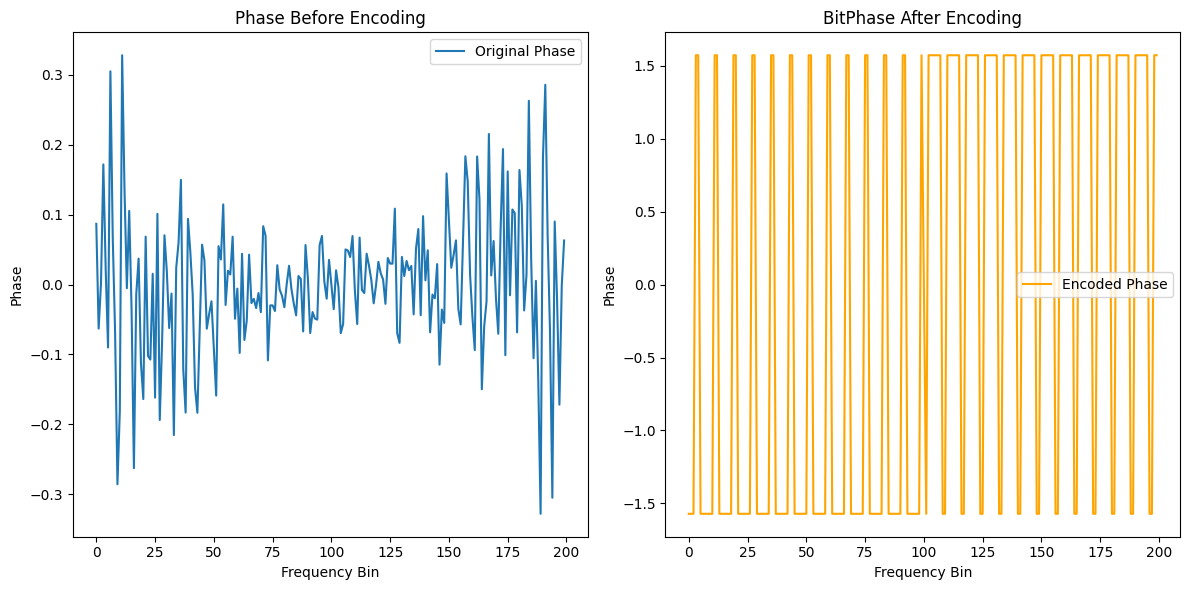

'lydFiler\\output.wav'

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_phases(phases_before, phases_after, chunk_size):
    midChunk = chunk_size // 2
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(phases_before[0, midChunk-100:midChunk+100], label="Original Phase")
    plt.title("Phase Before Encoding")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Phase")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(phases_after[0, midChunk-100:midChunk+100], label="Encoded Phase", color='orange')
    plt.title("BitPhase After Encoding")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Phase")
    plt.legend()

    plt.tight_layout()
    plt.show()

def encode(pathToAudio, stringToEncode, directory="stemografi\\lydFiler"):
    rate, audioData1 = wavfile.read(pathToAudio)
    stringToEncode = stringToEncode.ljust(100, '~')  # Pad with ~ to ensure fixed size
    textLength = 8 * len(stringToEncode)
    chunkSize = int(2 * 2 ** np.ceil(np.log2(2 * textLength)))
    numberOfChunks = int(np.ceil(audioData1.shape[0] / chunkSize))
    audioData = audioData1.copy()

    # Breaking the Audio into chunks
    if len(audioData1.shape) == 1:
        audioData.resize(numberOfChunks * chunkSize, refcheck=False)
        audioData = audioData[np.newaxis]
    else:
        audioData.resize((numberOfChunks * chunkSize, audioData.shape[1]), refcheck=False)
        audioData = audioData.T

    chunks = audioData[0].reshape((numberOfChunks, chunkSize))

    # Applying DFT on audio chunks
    chunks = np.fft.fft(chunks)
    magnitudes = np.abs(chunks)
    phases = np.angle(chunks)
    phaseDiff = np.diff(phases, axis=0)

    # Store the original phases for plotting
    original_phases = phases.copy()

    # Convert message to encode into binary
    textInBinary = np.ravel([[int(y) for y in format(ord(x), "08b")] for x in stringToEncode])
    
    # Convert message in binary to phase differences
    textInPi = textInBinary.copy()
    textInPi[textInPi == 0] = -1
    textInPi = textInPi * -np.pi / 2
    
    midChunk = chunkSize // 2

    # Phase conversion
    phases[0, midChunk - textLength: midChunk] = textInPi
    phases[0, midChunk + 1: midChunk + 1 + textLength] = -textInPi[::-1]

    # Compute the phase matrix
    for i in range(1, len(phases)):
        phases[i] = phases[i - 1] + phaseDiff[i - 1]

    # Store the modified phases for plotting
    modified_phases = phases.copy()

    # Plot phases before and after encoding
    plot_phases(original_phases, modified_phases, chunkSize)

    # Apply Inverse Fourier transform after applying phase differences
    chunks = (magnitudes * np.exp(1j * phases))
    chunks = np.fft.ifft(chunks).real

    # Combining all block of audio again
    audioData[0] = chunks.ravel().astype(np.int16)
    wavfile.write(directory + "\\output.wav", rate, audioData.T)
    return directory + "\\output.wav"

stringToEncode = 'Signalbehandling er gøy'
pathToAudio = 'lydFiler\\speech_w_tone.wav'

encode(pathToAudio, stringToEncode, directory="lydFiler")

In [9]:
import numpy as np
import sounddevice as sd
from scipy.fft import fft
import queue
import tkinter as tk

# A queue to hold the live audio chunks
audio_queue = queue.Queue()

# Audio capture settings
sample_rate = 44100  # Change according to your needs
chunk_size = 1024  # Size of each chunk to process

# Global variable to control the stream stop
continue_decoding = True

def stop_decoding():
    global continue_decoding
    continue_decoding = False  # Stop the decoding process

def audio_callback(indata, frames, time, status):
    if continue_decoding:
        # Put the audio data into the queue for decoding
        audio_queue.put(indata.copy())

# Function to decode live audio stream
def decode_live():
    global continue_decoding
    textLength = 800
    blockLength = 2 * int(2 ** np.ceil(np.log2(2 * textLength)))
    blockMid = blockLength // 2
    
    while continue_decoding:
        # Get audio chunk from the queue
        try:
            audio_chunk = audio_queue.get(timeout=1)
        except queue.Empty:
            if not continue_decoding:
                break  # Exit if the stop button is pressed
            print("No audio data received.")
            continue
        
        if audio_chunk.shape[0] < blockLength:
            print("Insufficient audio data, waiting for more chunks...")
            continue
        
        # Process the first block of audio
        if len(audio_chunk.shape) == 1:
            code = audio_chunk[:blockLength]
        else:
            code = audio_chunk[:blockLength, 0]
        
        # Get the phase and convert it to binary
        codePhases = np.angle(fft(code))[blockMid - textLength:blockMid]
        codeInBinary = (codePhases < 0).astype(np.int16)

        # Convert binary data into characters
        codeInIntCode = codeInBinary.reshape((-1, 8)).dot(1 << np.arange(8 - 1, -1, -1))
        
        # Combine characters to original text
        decoded_message = "".join(np.char.mod("%c", codeInIntCode)).replace("~", "")
        print("Decoded message:", decoded_message)
        break  # Once we have decoded a chunk, we can stop or continue depending on the use case.

# Start audio stream for live input
def start_live_decoding():
    global continue_decoding
    continue_decoding = True  # Reset the flag before starting
    with sd.InputStream(callback=audio_callback, channels=1, samplerate=sample_rate, blocksize=chunk_size):
        print("Listening to live audio input for decoding...")
        decode_live()  # Call the decoding function in real-time

# Tkinter GUI setup
def start_tkinter_app():
    # Create the main window
    root = tk.Tk()
    root.title("Audio Decoder")
    
    # Start Button
    start_button = tk.Button(root, text="Start Decoding", command=start_live_decoding)
    start_button.pack(pady=10)
    
    # Stop Button
    stop_button = tk.Button(root, text="Stop Decoding", command=stop_decoding)
    stop_button.pack(pady=10)

    # Run the Tkinter main loop
    root.mainloop()

# Start the Tkinter application
start_tkinter_app()

In [10]:

"""

import numpy as np 
import sounddevice as sd
from scipy.fft import fft
import queue
import tkinter as tk

# A queue to hold the live audio chunks
audio_queue = queue.Queue()

# Audio capture settings
sample_rate = 44100  # Change according to your needs
chunk_size = 1024  # Size of each chunk to process

# Global variable to control the stream stop
continue_decoding = True
decoded_message = ""  # Store the decoded message here

def stop_decoding():
    global continue_decoding
    continue_decoding = False  # Stop the decoding process
    print("Decoding stopped.")
    print("Decoded message:", decoded_message)  # Print the message when decoding is done

def audio_callback(indata, frames, time, status):
    if continue_decoding:
        # Put the audio data into the queue for decoding
        audio_queue.put(indata.copy())

# Function to decode live audio stream
def decode_live():
    global continue_decoding, decoded_message
    textLength = 800
    blockLength = 2 * int(2 ** np.ceil(np.log2(2 * textLength)))
    blockMid = blockLength // 2
    
    while continue_decoding:
        # Get audio chunk from the queue
        try:
            audio_chunk = audio_queue.get(timeout=1)
        except queue.Empty:
            if not continue_decoding:
                break  # Exit if the stop button is pressed
            continue
        
        if audio_chunk.shape[0] < blockLength:
            continue
        
        # Process the first block of audio
        if len(audio_chunk.shape) == 1:
            code = audio_chunk[:blockLength]
        else:
            code = audio_chunk[:blockLength, 0]
        
        # Get the phase and convert it to binary
        codePhases = np.angle(fft(code))[blockMid - textLength:blockMid]
        codeInBinary = (codePhases < 0).astype(np.int16)

        # Convert binary data into characters
        codeInIntCode = codeInBinary.reshape((-1, 8)).dot(1 << np.arange(8 - 1, -1, -1))
        
        # Combine characters to original text
        decoded_message = "".join(np.char.mod("%c", codeInIntCode)).replace("~", "")
    
    # Optionally handle remaining data here if needed

# Start audio stream for live input
def start_live_decoding():
    global continue_decoding
    continue_decoding = True  # Reset the flag before starting
    with sd.InputStream(callback=audio_callback, channels=1, samplerate=sample_rate, blocksize=chunk_size):
        print("Listening to live audio input for decoding...")
        decode_live()  # Call the decoding function in real-time

# Tkinter GUI setup
def start_tkinter_app():
    # Create the main window
    root = tk.Tk()
    root.title("Audio Decoder")
    
    # Stop Button
    stop_button = tk.Button(root, text="Stop Decoding", command=stop_decoding)
    stop_button.pack(pady=10)

    # Start live decoding as soon as the app starts
    start_live_decoding()

    # Run the Tkinter main loop
    root.mainloop()

# Start the Tkinter application
start_tkinter_app()


"""

'\n\nimport numpy as np \nimport sounddevice as sd\nfrom scipy.fft import fft\nimport queue\nimport tkinter as tk\n\n# A queue to hold the live audio chunks\naudio_queue = queue.Queue()\n\n# Audio capture settings\nsample_rate = 44100  # Change according to your needs\nchunk_size = 1024  # Size of each chunk to process\n\n# Global variable to control the stream stop\ncontinue_decoding = True\ndecoded_message = ""  # Store the decoded message here\n\ndef stop_decoding():\n    global continue_decoding\n    continue_decoding = False  # Stop the decoding process\n    print("Decoding stopped.")\n    print("Decoded message:", decoded_message)  # Print the message when decoding is done\n\ndef audio_callback(indata, frames, time, status):\n    if continue_decoding:\n        # Put the audio data into the queue for decoding\n        audio_queue.put(indata.copy())\n\n# Function to decode live audio stream\ndef decode_live():\n    global continue_decoding, decoded_message\n    textLength = 800\n  

In [11]:
#Yes, you will need to use concurrent programming (typically multithreading or multiprocessing) to run the live audio decoding process and keep the Tkinter GUI responsive at the same time.
#The reason is that Tkinter's mainloop is single-threaded and blocking. If you start a long-running process (such as your live decoding loop) within the Tkinter event loop, the GUI will freeze because Tkinter will wait for that process to finish before it can respond to user actions like clicking buttons.
#Solution: Use a Separate Thread for Decoding
#You can use Python's threading module to run the decoding process in a separate thread. This way, the Tkinter GUI remains responsive while the audio decoding happens in the background.
#Here’s how you can modify your code to use threads:
#Modified Code with Threading:
#python
#Copy code
"""

import numpy as np 
import sounddevice as sd
from scipy.fft import fft
import queue
import tkinter as tk
import threading  # For running the decoding in a separate thread

# A queue to hold the live audio chunks
audio_queue = queue.Queue()

# Audio capture settings
sample_rate = 44100  # Change according to your needs
chunk_size = 1024  # Size of each chunk to process

# Global variable to control the stream stop
continue_decoding = True
decoded_message = ""  # Store the decoded message here

# Function to stop decoding
def stop_decoding():
    global continue_decoding
    continue_decoding = False  # Stop the decoding process
    print("Decoding stopped.")
    print("Decoded message:", decoded_message)  # Print the message when decoding is done

# Callback function to capture audio in real-time
def audio_callback(indata, frames, time, status):
    if continue_decoding:
        # Put the audio data into the queue for decoding
        audio_queue.put(indata.copy())

# Function to decode the live audio stream
def decode_live():
    global continue_decoding, decoded_message
    textLength = 800
    blockLength = 2 * int(2 ** np.ceil(np.log2(2 * textLength)))
    blockMid = blockLength // 2
    
    while continue_decoding:
        # Get audio chunk from the queue
        try:
            audio_chunk = audio_queue.get(timeout=1)
        except queue.Empty:
            if not continue_decoding:
                break  # Exit if the stop button is pressed
            continue
        
        if audio_chunk.shape[0] < blockLength:
            continue
        
        # Process the first block of audio
        if len(audio_chunk.shape) == 1:
            code = audio_chunk[:blockLength]
        else:
            code = audio_chunk[:blockLength, 0]
        
        # Get the phase and convert it to binary
        codePhases = np.angle(fft(code))[blockMid - textLength:blockMid]
        codeInBinary = (codePhases < 0).astype(np.int16)

        # Convert binary data into characters
        codeInIntCode = codeInBinary.reshape((-1, 8)).dot(1 << np.arange(8 - 1, -1, -1))
        
        # Combine characters to original text
        decoded_message = "".join(np.char.mod("%c", codeInIntCode)).replace("~", "")
    
    # Optionally handle remaining data here if needed

# Function to start the live audio decoding in a new thread
def start_live_decoding():
    global continue_decoding
    continue_decoding = True  # Reset the flag before starting
    
    # Start the sounddevice input stream
    stream = sd.InputStream(callback=audio_callback, channels=1, samplerate=sample_rate, blocksize=chunk_size)
    
    # Start the decoding process in a separate thread to keep Tkinter responsive
    threading.Thread(target=lambda: decode_in_thread(stream)).start()

# Wrapper to manage the stream and decoding in a thread
def decode_in_thread(stream):
    # Start the input stream
    with stream:
        print("Listening to live audio input for decoding...")
        decode_live()  # Call the decoding function in real-time

# Tkinter GUI setup
def start_tkinter_app():
    # Create the main window
    root = tk.Tk()
    root.title("Audio Decoder")
    
    # Stop Button
    stop_button = tk.Button(root, text="Stop Decoding", command=stop_decoding)
    stop_button.pack(pady=10)

    # Start live decoding as soon as the app starts
    start_live_decoding()

    # Run the Tkinter main loop
    root.mainloop()

# Start the Tkinter application
start_tkinter_app()


"""

'\n\nimport numpy as np \nimport sounddevice as sd\nfrom scipy.fft import fft\nimport queue\nimport tkinter as tk\nimport threading  # For running the decoding in a separate thread\n\n# A queue to hold the live audio chunks\naudio_queue = queue.Queue()\n\n# Audio capture settings\nsample_rate = 44100  # Change according to your needs\nchunk_size = 1024  # Size of each chunk to process\n\n# Global variable to control the stream stop\ncontinue_decoding = True\ndecoded_message = ""  # Store the decoded message here\n\n# Function to stop decoding\ndef stop_decoding():\n    global continue_decoding\n    continue_decoding = False  # Stop the decoding process\n    print("Decoding stopped.")\n    print("Decoded message:", decoded_message)  # Print the message when decoding is done\n\n# Callback function to capture audio in real-time\ndef audio_callback(indata, frames, time, status):\n    if continue_decoding:\n        # Put the audio data into the queue for decoding\n        audio_queue.put(in